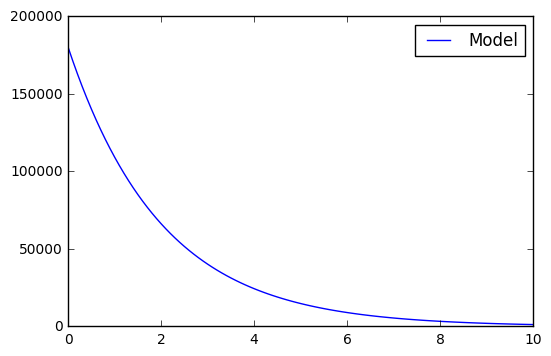

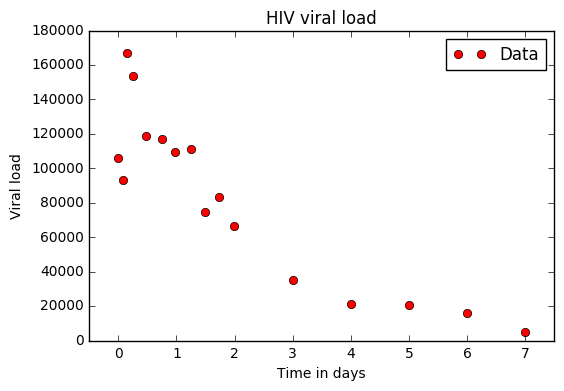

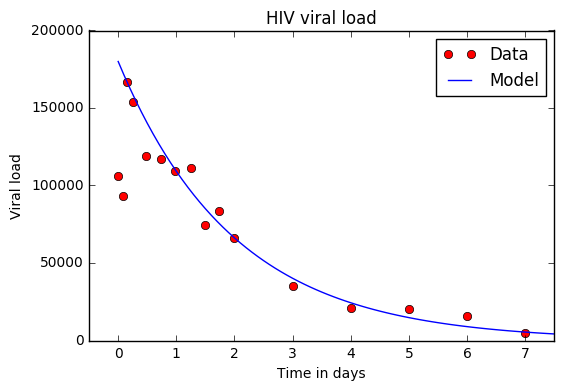

In [70]:
#First Computer Lab

# HIV Example

import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0,10,101)

B = 1
A = 180000
alpha = 0.5
beta = 0.10

viral_load_model = A * np.exp(-alpha*time) + B * np.exp(-beta*time)

plt.figure(1)
plt.plot(time, viral_load_model, label='Model')
plt.legend(loc='best')
plt.show()

hiv_data = np.loadtxt('./files/PMLSdata/01HIVseries/HIVseries.csv',delimiter=',')

time_in_days = hiv_data[:,0]
viral_load = hiv_data[:,1]

plt.figure(2)
plt.plot(time_in_days, viral_load, 'ro', label='Data')
plt.xlabel('Time in days')
plt.ylabel('Viral load')
plt.title('HIV viral load')
plt.xlim(-0.5,7.5)
plt.legend(loc='best')
plt.show()


plt.figure(3)
plt.plot(time_in_days, viral_load, 'ro', label='Data')
plt.plot(time, viral_load_model, 'b-', label='Model')
plt.xlabel('Time in days')
plt.ylabel('Viral load')
plt.title('HIV viral load')
plt.xlim(-0.5,7.5)
plt.legend(loc='best')
plt.show()

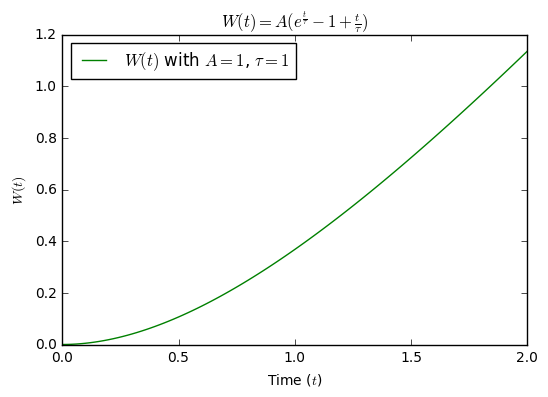

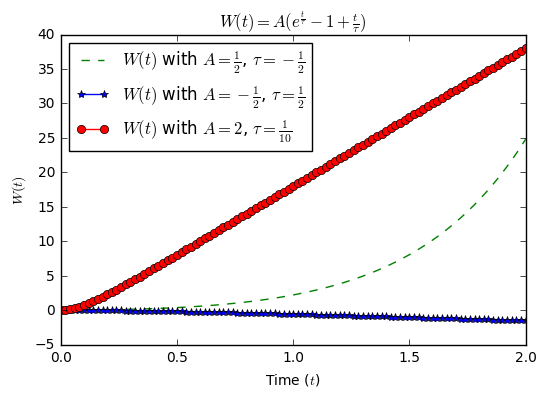

In [116]:
# Bacterial example

t = np.linspace(0,2,101)
tau = 1
A = 1

v = 1 - np.exp(-t/tau)
w = A * (np.exp(-t/tau) - 1 + t/tau)

plt.figure(4)
plt.plot(t,w,'g-', label=r'$W(t)$ with $A = 1$, $\tau = 1$')
plt.title(r'$W(t) = A(e^{\frac{t}{\tau}} - 1 + \frac{t}{\tau})$')
plt.xlabel('Time ($t$)')
plt.ylabel(r'$W(t)$')
plt.legend(loc='best')
plt.show()

A1 = 0.5
A2 = -0.5
A3 = 2

tau1 = -0.5
tau2 = 0.5
tau3 = 0.1

w1 = A1 * (np.exp(-t/tau1) - 1 + t/tau1)
w2 = A2 * (np.exp(-t/tau2) - 1 + t/tau2)
w3 = A3 * (np.exp(-t/tau3) - 1 + t/tau3)

plt.figure(5)
plt.plot(t,w1,'g--',label=r'$W(t)$ with $A = \frac{1}{2}$, $\tau = -\frac{1}{2}$')
plt.plot(t,w2,'b-*',label=r'$W(t)$ with $A = -\frac{1}{2}$, $\tau = \frac{1}{2}$')
plt.plot(t,w3,'ro-',label=r'$W(t)$ with $A = 2$, $\tau = \frac{1}{10}$')
plt.title(r'$W(t) = A(e^{\frac{t}{\tau}} - 1 + \frac{t}{\tau})$')
plt.xlabel('Time ($t$)')
plt.ylabel(r'$W(t)$')
plt.legend(loc='best')
plt.show()

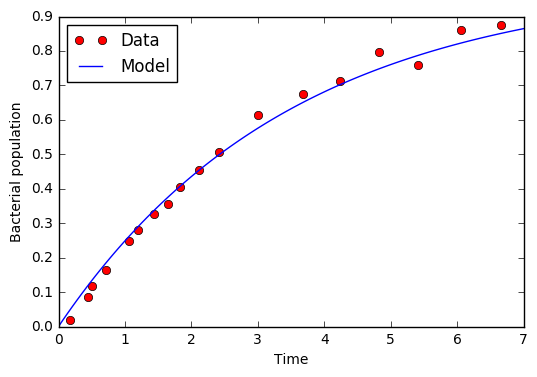

In [132]:
novick_data = np.loadtxt('./files/PMLSdata/15novick/g149novickA.txt',delimiter=',')

time_data = novick_data[:,0]
bpop_data = novick_data[:,1]

tp = np.linspace(0,7,101)
tau2 = 3.5
v = 1 - np.exp(-tp/tau2)

plt.figure(6)
plt.plot(time_data, bpop_data, 'ro', label='Data')
plt.plot(tp, v, 'b-', label='Model')
plt.xlabel('Time')
plt.ylabel('Bacterial population')
plt.legend(loc='best')
plt.show()

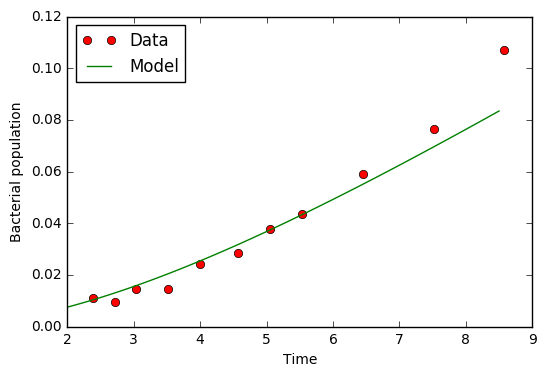

In [153]:
novick_data2 = np.loadtxt('./files/PMLSdata/15novick/g149novickB.txt',delimiter=',')

time_data2 = novick_data2[:11,0]
bpop_data2 = novick_data2[:11,1]

tpp = np.linspace(2,8.5,101)
tau3 = 3.5
AA = 0.055
w = AA * (np.exp(-tpp/tau3) - 1 + tpp/tau3)

plt.figure(6)
plt.plot(time_data2, bpop_data2, 'ro', label='Data')
plt.plot(tpp, w, 'g-', label='Model')
plt.xlabel('Time')
plt.ylabel('Bacterial population')
plt.legend(loc='best')
plt.show()